# Manipulation de fichiers `csv` avec Python

## Extraire un fichier `csv`

On commence par récupérer un fichier en ligne avec la commande `urlretrieve` de la bibliothèque `urllib`. On aura aussi besoin d'importer la bibliothèque `csv` :

In [1]:
from urllib.request import urlretrieve
import csv

fichier_paroles_csv, _ = urlretrieve('https://raw.githubusercontent.com/Informathix/2nde/master/2019_20/Projet2_Donnees/ParoleFemmes.csv')

Ensuite on transforme ce fichier `csv` en une liste de lignes exploitables par Python:

In [2]:
lecteur_paroles = csv.DictReader(open(fichier_paroles_csv, 'r', encoding='utf8'))
paroles = [dict(ligne) for ligne in lecteur_paroles]

Chaque ligne est numérotée (attention, la numérotation commence à 0):

In [3]:
paroles[0]

{'media_type': 'radio',
 'channel_name': 'Chérie FM',
 'is_public_channel': 'False',
 'year': '2002',
 'women_expression_rate': '47.10994424236209',
 'speech_rate': '15.738694355458852',
 'nb_hours_analyzed': '718.0'}

In [4]:
paroles[1]

{'media_type': 'radio',
 'channel_name': 'Chérie FM',
 'is_public_channel': 'False',
 'year': '2003',
 'women_expression_rate': '46.03444471353921',
 'speech_rate': '16.250258185942855',
 'nb_hours_analyzed': '1617.0'}

Pour avoir l'ensemble des descripteurs :

In [5]:
[descripteur for descripteur in paroles[0]]

['media_type',
 'channel_name',
 'is_public_channel',
 'year',
 'women_expression_rate',
 'speech_rate',
 'nb_hours_analyzed']

## Manipulation des données

Voici par exemple un moyen d'obtenir l'ensemble des noms des radios.

In [6]:
radios = {
    ligne['channel_name'] 
    for ligne in paroles 
    if ligne['media_type'] == 'radio' 
}

In [7]:
radios

{'Chérie FM',
 'Europe 1',
 'France Bleu',
 'France Culture',
 'France Info',
 'France Inter',
 'France Musique',
 'Fun Radio',
 'MOUV',
 'NRJ',
 'Nostalgie',
 'RFI',
 'RFM',
 'RMC',
 'RTL',
 'RTL 2',
 'Radio Classique',
 'Rire et Chansons',
 'Skyrock',
 'Sud Radio',
 'Virgin Radio'}

Quel est l'ensemble des chaînes de TV analysées ? 

Quelle radio a offert le plus grand taux de parole aux femmes en 2017 et quel était ce taux ?

In [8]:
max(
    {
        (ligne['women_expression_rate'], ligne['channel_name']) 
        for ligne in paroles 
        if ligne['media_type'] == 'radio'
    }
)

('54.119721666465516', 'Chérie FM')

Quelle télévision a offert le plus petit taux de parole aux femmes en 2019 et quel était ce taux ? 

Quelle radio publique a offert le plus petit taux de parole aux femmes en 2019 et quel était ce taux ?

Quelle radio publique a offert le plus petit taux de parole aux femmes en 2019 et quel était ce taux ?

Imaginez d'autres questions et répondez-y

On peut visualiser des résultats

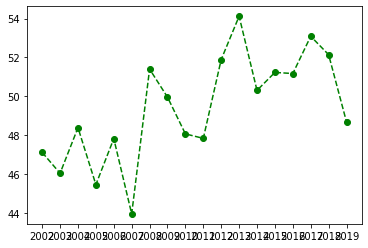

In [10]:
from matplotlib.pyplot import plot

taux_cheri = [float(ligne['women_expression_rate']) 
              for ligne in paroles 
              if ligne['channel_name'] == 'Chérie FM']

annee_cheri = [ligne['year'] 
               for ligne in paroles 
               if ligne['channel_name'] == 'Chérie FM']

plot(annee_cheri, taux_cheri, 'g--o') # g comme Green, -- comme tirets, o comme rond